In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import csv
import os
from PIL import Image
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)
# Save image parameters to the constants that we will use later for data re-shaping and
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape 
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);
with open('opdata1.csv', 'r') as file: 
    reader = csv.reader(file)
    x_list = []
    x_train_list = []
    y_list = []
    y_train_list = [] 
    i=0
    for row in reader:
        imageName = row[0]
        operator_name = row[1]
        #print(imageName)
        #path = "C:\\Users\\Aadarsh Gupta\\imgdata" 
        path = os.path.join("imgdata", imageName)
        if(os.path.exists(path)and imageName!=""):
            im = Image.open(path, "r")
            #im = list(im.getdata()) im = np.array(im)
            #if (i>200):
            #    break 
            if(i<0.7*50000):
                im = np.array(im)
                x_list.append(im) 
                if(operator_name=="plus"):
                    y_list.append(10) 
                if(operator_name=="minus"):
                    y_list.append(11) 
                if(operator_name=="mul"): 
                    y_list.append(12) 
                if(operator_name=="div"):
                    y_list.append(13) 
            else:
                im = np.array(im)
                x_train_list.append(im)

                if(operator_name=="plus"):
                    y_train_list.append(10) 
                if(operator_name=="minus"):
                    y_train_list.append(11)
                if(operator_name=="mul"):
                    y_train_list.append(12)
                if(operator_name=="div"): 
                    y_train_list.append(13)
        i+=1
    x_list = np.array(x_list)
    y_list = np.array(y_list)
    x_train_list = np.array(x_train_list)
    y_train_list = np.array(y_train_list)
    # print csv content of row can remove it
    print(x_list.shape)
    print(type(x_train), type(y_train), type(x_list), type(y_list), type(x_train_list))
    x_train = np.concatenate((x_train, x_list))
    y_train = np.concatenate((y_train, y_list))
    x_test = np.concatenate((x_test, x_train_list))
    y_test = np.concatenate((y_test, y_train_list))
    print('x_train:', x_train.shape) 
    print('y_train:', y_train.shape) 
    print('x_test:', x_test.shape) 
    print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1
(17500, 28, 28)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
x_train: (77500, 28, 28)
y_train: (77500,)
x_test: (15322, 28, 28)
y_test: (15322,)


In [20]:
x_train_with_chanels = x_train.reshape( 
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_test_with_chanels = x_test.reshape( 
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
print('x_train_with_chanels:', x_train_with_chanels.shape) 
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (77500, 28, 28, 1)
x_test_with_chanels: (15322, 28, 28, 1)


In [21]:
x_train_normalized = x_train_with_chanels / 255 
x_test_normalized = x_test_with_chanels / 255

In [22]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) 
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25)) 
model.add(tf.keras.layers.Dense(14,activation=tf.nn.softmax))

In [23]:
tf.keras.utils.plot_model( 
    model,
    show_shapes=True,
    show_layer_names=True, 
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [24]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer, 
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    metrics=['accuracy']
)

In [25]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit( 
    x_train_normalized,
    y_train,
    epochs=10, 
    validation_data=(x_test_normalized, y_test), 
    callbacks=[tensorboard_callback]
)

Epoch 1/10
2422/2422 [==============================] - 539s 222ms/step - loss: 0.3035 - accuracy: 0.9053 - val_loss: 0.2766 - val_accuracy: 0.9081
Epoch 2/10
2422/2422 [==============================] - 382s 158ms/step - loss: 0.2026 - accuracy: 0.9366 - val_loss: 0.2669 - val_accuracy: 0.9129
Epoch 3/10
2422/2422 [==============================] - 376s 155ms/step - loss: 0.1856 - accuracy: 0.9418 - val_loss: 0.2574 - val_accuracy: 0.9155
Epoch 4/10
2422/2422 [==============================] - 391s 162ms/step - loss: 0.1783 - accuracy: 0.9438 - val_loss: 0.2537 - val_accuracy: 0.9157
Epoch 5/10
2422/2422 [==============================] - 383s 158ms/step - loss: 0.1745 - accuracy: 0.9452 - val_loss: 0.2543 - val_accuracy: 0.9150
Epoch 6/10
2422/2422 [==============================] - 463s 191ms/step - loss: 0.1696 - accuracy: 0.9467 - val_loss: 0.2575 - val_accuracy: 0.9151
Epoch 7/10
2422/2422 [==============================] - 390s 161ms/step - loss: 0.1684 - accuracy: 0.9463 - val_

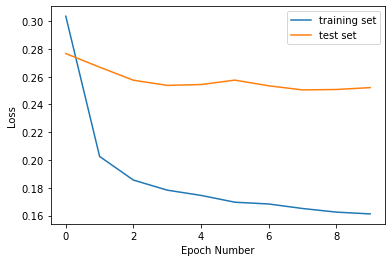

In [26]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set') 
plt.legend()

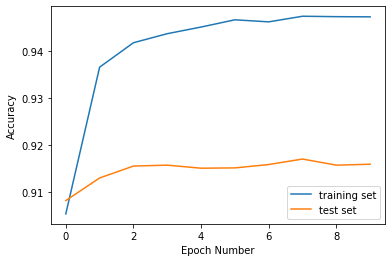

In [27]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy') 
plt.plot(training_history.history['accuracy'], label='training set') 
plt.plot(training_history.history['val_accuracy'], label='test set') 
plt.legend()

In [28]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [29]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.14488807320594788
Training accuracy:  0.9512258172035217


In [30]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [31]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.2521303594112396
Validation accuracy:  0.9158725738525391


In [32]:
model_name = 'digits_recognition_cnn.h5' 
model.save(model_name, save_format='h5')

In [33]:
loaded_model = tf.keras.models.load_model(model_name)

In [34]:
predictions_one_hot = loaded_model.predict([x_test_normalized]) 
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (15322, 14)


In [35]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,7.736985e-10,2.023416e-07,1.092851e-06,3.122085e-07,6.155611e-08,6.669685e-10,9.019053e-15,9.999948e-01,2.759731e-08,3.232464e-06,8.653753e-09,4.863548e-08,2.456161e-08,7.411232e-08
1,4.678052e-10,2.697894e-12,1.000000e+00,4.872980e-12,4.361851e-15,1.309985e-15,1.636039e-10,2.919339e-16,1.733063e-12,1.053712e-14,4.221272e-14,1.166622e-11,5.960745e-13,3.437822e-12
2,1.938342e-07,9.999950e-01,3.222800e-08,2.592806e-11,5.669645e-07,7.741822e-08,3.360716e-06,2.300751e-07,2.759380e-07,8.982722e-09,1.853825e-08,2.120011e-08,1.632211e-08,9.393441e-08
3,9.999999e-01,1.526594e-13,2.243195e-11,1.433415e-11,4.868638e-13,2.607878e-10,1.450871e-07,1.326011e-11,1.366582e-08,9.716054e-10,4.504508e-12,2.264422e-12,2.578431e-09,7.507625e-10
4,2.919032e-08,2.820393e-07,1.704183e-08,6.392076e-09,9.981967e-01,2.042565e-07,2.615767e-06,4.577162e-08,2.409165e-06,1.797277e-03,2.016661e-07,2.567780e-08,1.995339e-08,1.952676e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15317,1.158797e-07,9.302837e-10,2.156536e-07,5.837503e-09,6.130754e-10,3.845425e-06,6.348638e-08,3.834403e-08,7.388464e-09,3.038398e-08,6.305722e-03,8.185277e-01,5.584664e-03,1.695776e-01
15318,5.592024e-09,3.249268e-07,9.125117e-06,7.879541e-08,6.533749e-09,2.135994e-06,9.926549e-07,1.227590e-07,1.425807e-06,4.025896e-08,2.105559e-02,1.009989e-01,9.229596e-02,7.856354e-01
15319,3.363975e-12,1.957394e-07,4.244789e-08,2.564277e-09,2.252560e-08,2.106019e-07,3.867813e-09,2.116482e-09,4.769075e-09,1.701387e-09,1.018522e-03,4.143047e-02,7.541203e-01,2.034302e-01
15320,1.160845e-12,6.100440e-08,3.235627e-08,1.659967e-11,3.779072e-09,7.521114e-10,4.912537e-09,3.273854e-09,1.863079e-11,1.089577e-10,8.684191e-01,1.694509e-02,1.069344e-02,1.039423e-01


In [36]:
predictions = np.argmax(predictions_one_hot, axis=1) 
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
15317,11
15318,13
15319,12
15320,10


In [65]:
with open("annotations.csv", 'r') as file:
    reader = csv.reader(file)
    i = 0
    j=0
    for row in reader:
        if (i<400):
            imageName = row[0]
            expression_type = row[1]
            expression_value = row[2]
            path = os.path.join("data", imageName)
            if(os.path.exists(path)):
                im = Image.open(path, "r")
                width, height = im.size
                im = ImageOps.invert(im)
                # box1 is 0  to width/3 
                box1 = (0, 0, width/3, height)
                # box2 is width/3 to 2*width/3
                box2 = (width/3, 0, 2*width/3, height)
                # box3 is 2*width/3 to width
                box3 = (2*width/3, 0, width, height)
                dig1 = ""
                dig2 = ""
                op = ""

                if(expression_type == "infix"):
                    dig1 = im.crop(box1)
                    op = im.crop(box2)
                    dig2 = im.crop(box3)
                elif(expression_type == "prefix"):
                    op = im.crop(box1)
                    dig1 = im.crop(box2)
                    dig2 = im.crop(box3)
                else:
                    dig1 = im.crop(box1)
                    dig2 = im.crop(box2)
                    op = im.crop(box3)


                dig1 = dig1.resize((28,28))
                np.array(dig1)
                dig2 = dig2.resize((28,28))
                np.array(dig2)
                op = op.resize((28,28))
                np.array(op)

                pix1 = list(list(dig1.getdata()))
                pixel1 = np.array(pix1)
                pixel1 = pixel1/255
                pixel1 = pixel1.reshape(1,28,28,1)


                pix2 = list(list(dig2.getdata()))
                pixel2 = np.array(pix2)
                pixel2 = pixel2/255
                pixel2 = pixel2.reshape(1,28,28,1)
                
                pix3 = list(list(op.getdata()))
                pixel3 = np.array(pix3)
                pixel3 = pixel3/255
                pixel3 = pixel3.reshape(1,28,28,1)


              
                # this is original but for now i keep fixed 
                dig1 = np.argmax(loaded_model.predict(pixel1), axis =1)[0]
                dig1 = int(dig1)
                dig2 = np.argmax(loaded_model.predict(pixel2), axis =1)[0]
                dig2 = int(dig2)
                op = np.argmax(loaded_model.predict(pixel3), axis =1)[0]
                op = int(op)
                expression_value = int(expression_value)
                if(op==10):
                    if(dig1+dig2==expression_value):
                        j=j+1
                        print(imageName)
                    #print(dig1,dig2,"+",dig1+dig2,expression_value)
                elif(op==11):
                    if(dig1-dig2==expression_value):
                        j=j+1
                        print(imageName)
                    #print(dig1,dig2,"-",dig1-dig2,expression_value)
                elif(op==12):
                    if(dig1*dig2==expression_value):
                        j=j+1
                        print(imageName)
                    #print(dig1,dig2,"*",dig1*dig2,expression_value)
                elif(op==13):
                    if(dig1//dig2==expression_value):
                        j=j+1
                        print(imageName)
                    #print(dig1,dig2,"/",dig1//dig2,expression_value)
                #value = int(expression_value)
                    
        i= i+1
    print(j)

7.jpg
8.jpg
9.jpg
12.jpg
16.jpg
19.jpg
20.jpg
21.jpg
23.jpg
28.jpg
29.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
38.jpg
39.jpg
41.jpg
45.jpg
50.jpg
51.jpg
53.jpg
54.jpg
59.jpg
60.jpg
62.jpg
64.jpg
65.jpg
68.jpg
71.jpg
75.jpg
76.jpg
79.jpg
88.jpg
89.jpg
90.jpg
91.jpg
101.jpg
103.jpg
104.jpg
105.jpg
108.jpg
109.jpg
113.jpg
114.jpg
116.jpg
117.jpg
123.jpg
124.jpg
125.jpg
130.jpg
131.jpg
132.jpg
137.jpg
139.jpg
142.jpg
145.jpg
146.jpg
147.jpg
148.jpg
151.jpg
158.jpg
162.jpg
167.jpg
169.jpg
170.jpg
171.jpg
177.jpg
179.jpg
182.jpg
183.jpg
184.jpg
185.jpg
186.jpg
187.jpg
191.jpg
192.jpg
194.jpg
195.jpg
197.jpg
199.jpg
209.jpg
211.jpg
221.jpg
222.jpg
223.jpg
231.jpg
232.jpg
234.jpg
235.jpg
237.jpg
242.jpg
243.jpg
248.jpg
250.jpg
253.jpg
254.jpg
255.jpg
263.jpg
265.jpg
275.jpg
276.jpg
277.jpg
278.jpg
281.jpg
282.jpg
288.jpg
289.jpg
290.jpg
292.jpg
294.jpg
306.jpg
308.jpg
312.jpg
313.jpg
315.jpg
317.jpg
321.jpg
323.jpg
324.jpg
329.jpg
330.jpg
331.jpg
334.jpg
335.jpg
338.jpg
339.jpg
343.jpg
34

In [71]:
import csv
from PIL import Image
import os
count = 0
i = 0
with open('opdata2.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        imageName = row[0]
        expression_type = row[1]
        path = os.path.join("imgdata", imageName)
        if(os.path.exists(path) and imageName!=""):
            if(i<200):
                im = Image.open(path, "r")
                pix = list(list(im.getdata()))
                pixel = np.array(pix)
                pixel = pixel/255
                pixel = pixel.reshape(1,28,28,1) 
                predictions_one_hot1 = loaded_model.predict(pixel)
                predictions = np.argmax(predictions_one_hot1, axis=1) 
                pd.DataFrame(predictions)
                if(predictions[0]==10 and expression_type=="plus"):
                    count=count+1
                elif(predictions[0]==11 and expression_type=="minus"):
                    count=count+1
                elif(predictions[0]==12 and expression_type=="mul"):
                    count=count+1
                elif(predictions[0]==13 and expression_type=="div"):
                    count=count+1
                i=i+1
            else:
                break
    print(count)

154
